In [111]:
## Bulid the linear Regression model using scikit learn in boston data to predict "price" base on other depenedent variable

import numpy as  np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
from sklearn.datasets import  load_boston
boston =  load_boston()


In [112]:
bos_df =  pd.DataFrame(boston.data,columns=boston.feature_names)
bos_df.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [113]:
boston.target[0:5]

array([24. , 21.6, 34.7, 33.4, 36.2])

In [114]:
bos_df["Target"] = boston.target

In [115]:
bos_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [116]:
bos_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
Target     506 non-null float64
dtypes: float64(14)
memory usage: 55.4 KB


In [117]:
from sklearn.linear_model import  LinearRegression
X_data = bos_df.drop('Target', axis=1)

In [118]:
linear_model = LinearRegression()
linear_model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [119]:
linear_model.fit(X_data,bos_df.Target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [120]:
print ("Estimated Intercept Co efficient :\t",linear_model.intercept_)

Estimated Intercept Co efficient :	 36.49110328036135


In [121]:
print ("Number of Co efficient :\t",len(linear_model.coef_))

Number of Co efficient :	 13


In [122]:
Feature_coefficient = pd.DataFrame(columns=['Features','estimated_coefficients'])
Feature_coefficient["Features"] = X_data.columns
Feature_coefficient["estimated_coefficients"] = linear_model.coef_

In [123]:
Feature_coefficient

,Features,estimated_coefficients
0,CRIM,-0.107171
1,ZN,0.046395
2,INDUS,0.020860
3,CHAS,2.688561
4,NOX,-17.795759
5,RM,3.804752
6,AGE,0.000751
7,DIS,-1.475759
8,RAD,0.305655
9,TAX,-0.012329


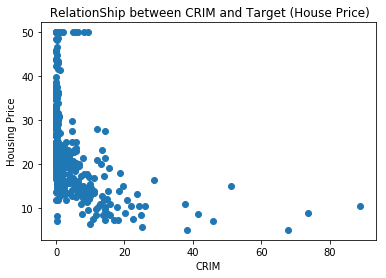

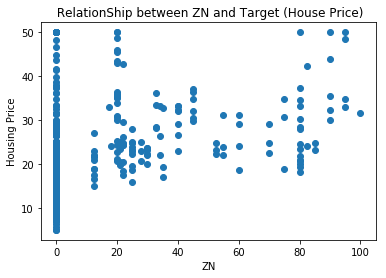

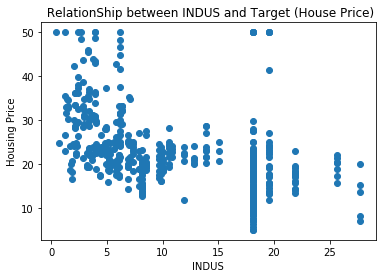

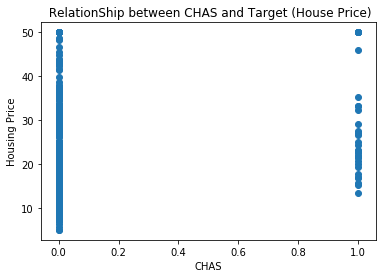

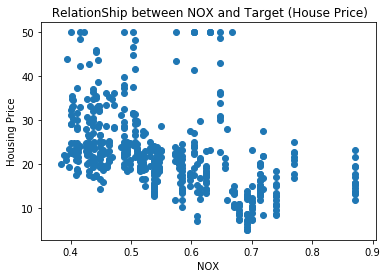

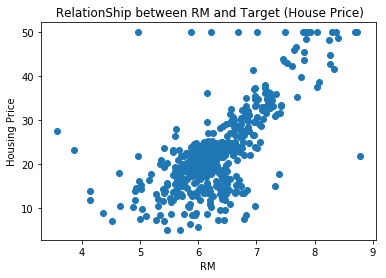

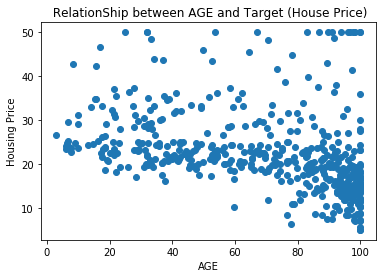

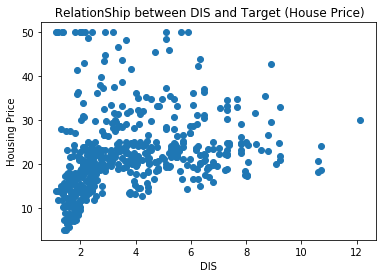

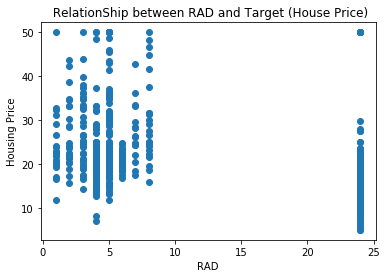

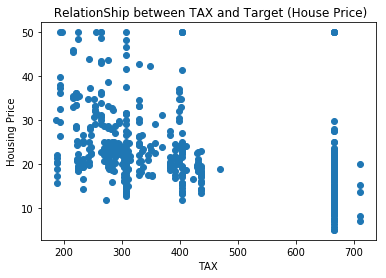

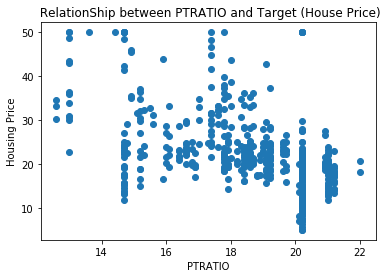

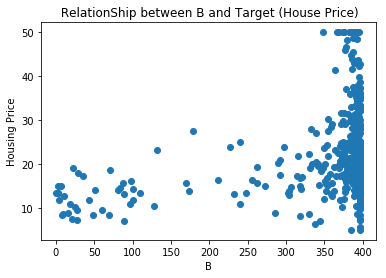

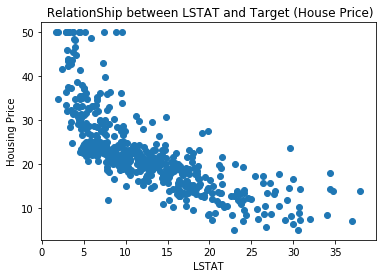

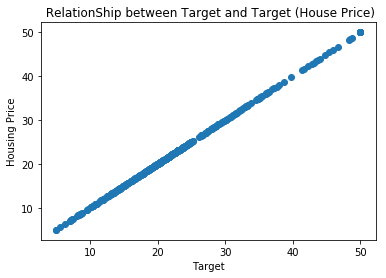

In [124]:
import matplotlib.pyplot as plt

for j in (bos_df.columns):
    fig = plt.figure()
    ax1 = fig.add_subplot(111)

    plt.scatter(bos_df[str(j)],bos_df.Target)
    plt.xlabel(str(j))
    plt.ylabel("Housing Price")
    plt.title(" RelationShip between {} and Target (House Price)".format(str(j)))
        

In [125]:
# Mean Square Error
import numpy as np
mse_ = np.mean((bos_df.Target - linear_model.predict(X_data))**2)
print (mse_)

21.897779217687496


In [126]:
import sklearn.model_selection

In [130]:

X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X_data,bos_df.Target, test_size = 0.30, random_state = 5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(354, 13)
(152, 13)
(354,)
(152,)


Text(0.5,1,'Prices vs Predicted prices: $Y_i$ vs $\\hat{Y}_i$')

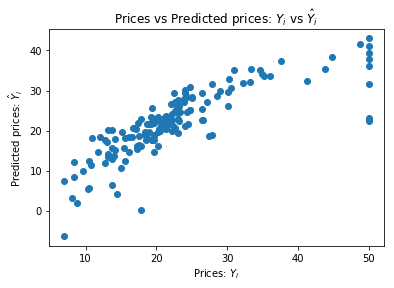

In [131]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train, Y_train)

Y_pred = lm.predict(X_test)

plt.scatter(Y_test, Y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")